In [1]:
import numpy as np
import pandas as pd
%pylab inline
from pylab import rcParams
rcParams['figure.figsize'] = 16,4

Populating the interactive namespace from numpy and matplotlib


## Dataset: IBM stock values from 1962 to 2018

In [2]:
# series = pd.read_csv('ibm_daily_1962-2018.csv', sep='\t',header=0, squeeze=True)
series = pd.read_csv('ibm_daily_1962-2018.csv', sep='\t',header=0, parse_dates=[0], index_col=0, squeeze=True)

In [3]:
series.head()

,Open,High,Low,Close,Adj,Volume
Date,,,,,,
1962-01-02,7.713333,7.713333,7.626667,7.626667,0.689273,387200
1962-01-03,7.626667,7.693333,7.626667,7.693333,0.695299,288000
1962-01-04,7.693333,7.693333,7.613333,7.616667,0.688370,256000
1962-01-05,7.606667,7.606667,7.453333,7.466667,0.674813,363200
1962-01-08,7.460000,7.460000,7.266667,7.326667,0.662160,544000


In [4]:
series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14168 entries, 1962-01-02 to 2018-04-13
Data columns (total 6 columns):
Open      14168 non-null float64
High      14168 non-null float64
Low       14168 non-null float64
Close     14168 non-null float64
Adj       14168 non-null float64
Volume    14168 non-null int64
dtypes: float64(5), int64(1)
memory usage: 774.8 KB


In [5]:
# series è formato da 6 diverse time series, devo covertire il dataframe series in 6 series che hanno come indice la data
# per settare l'indice uso set_index, per convertirle in series uso T.squeeze
# NB se prima setto l'indice poi prendo la prima colonna l'indice diventa artificiale da 0 a len(series)

In [6]:
openS = series[['Open']].squeeze()
highS = series[['High']].squeeze()
lowS = series[['Low']].squeeze()
closeS = series[['Close']].squeeze()
adjS = series[['Adj']].squeeze()
volumeS = series[['Volume']].squeeze()

In [7]:
openS.head()

Date
1962-01-02    7.713333
1962-01-03    7.626667
1962-01-04    7.693333
1962-01-05    7.606667
1962-01-08    7.460000
Name: Open, dtype: float64

In [8]:
type(openS)

pandas.core.series.Series

In [9]:
type(openS.index)

pandas.core.indexes.datetimes.DatetimeIndex

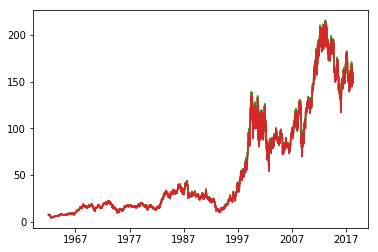

In [10]:
plot(openS)
plot(closeS)
plot(highS) 
plot(lowS)
# sono tutte uguali praticamente

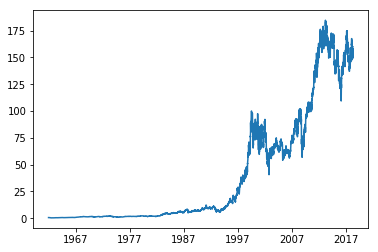

In [11]:
plot(adjS)
# sembra uguale a quelle sopra, solo che ha tutti i valori piu piccoli

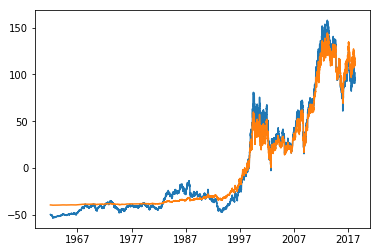

In [12]:
plot(openS - openS.mean())
plot(adjS - adjS.mean())
# sono abbastanza simili

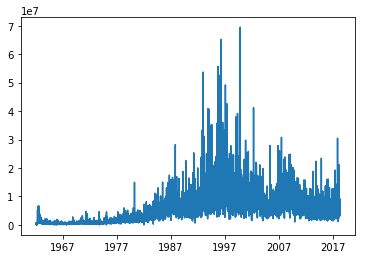

In [13]:
plot(volumeS)

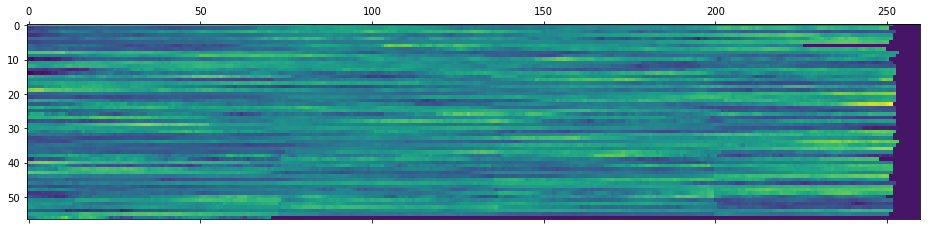

In [14]:
from pandas import Grouper
from pandas import DataFrame
groups1 = openS.groupby(Grouper(freq='Y'))   # fa gruppi di series per anni (Y)... [ricorda il groupby object di pandas!]
mm1 = DataFrame()
for name, group in groups1:
    norm_values = (group.values - mean(group.values)) / std(group.values)
    
    # Padding performed to have series of same length -- important only for plotting the matrix
    # pad_values = np.pad(norm_values,(0,365-len(norm_values)), 'constant', constant_values=-3)
    
    # dovrei usare 365 ma plottando ho visto che nessuna ts va oltre 260, quindi faccio 260-....
    pad_values = np.pad(norm_values,(0,260-len(norm_values)), 'constant', constant_values=-3)
     # la funzione pad riempie la time series norm_value con i valori -3 se la serie è lunga meno di 365
    
    mm1["%s" % (name.year)] = pad_values           # mm1 è il dataframe che contiene le time series di ogni anno normalizzate

matshow(mm1.T, interpolation=None, aspect='auto')

In [15]:
mm1.tail()    # qua si vede cosa fa pad  

,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
255,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,...,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0
256,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,...,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0
257,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,...,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0
258,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,...,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0
259,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,...,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0


# iniziamo il clustering, per incominciare bisogna definire delle distanze 

In [16]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

In [17]:
# PRIMA PROVA DISTANZA EUCLIDEA

def distanza_euclidea(x, y):
    somma = 0
    for i in range(len(x)):
        somma += (x[i] - y[i])**2
    return somma**(1/2)

In [18]:

# CALCOLIAMO LA MATRICE DELLE DISTANZE

# CAUTION !!! CAN BE VERY SLOW !!!
year_list = mm1.keys()
# Compute upper half of matrix
dd1 = [ [ (distanza_euclidea(mm1[year_list[x]],mm1[year_list[y]]) \
           if y > x else -1)  \
         for y in range(len(year_list)) ] 
       for x in range(len(year_list)) ]

# Copy values also to the lower half, exployting symmetry of the distance function
dd2 = [ [ (dd1[x][y] if y > x else dd1[y][x])  for y in range(len(year_list)) ] for x in range(len(year_list)) ]

# Finally, the diagonal
for i in range(len(year_list)):
    dd2[i][i] = 0.0

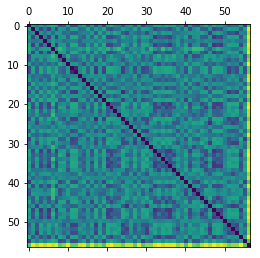

In [19]:
matshow(dd2, interpolation=None, aspect='auto')

In [20]:
from scipy.stats import itemfreq

db = DBSCAN(eps=46, min_samples=2, metric='precomputed').fit(dd2)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)

print('Number of clusters found: %d' % n_clusters_)
print (itemfreq(db.labels_))

cluster_sets = [ (l_,year_list[db.labels_ == l_]) for l_ in set(db.labels_) ]
for pp in cluster_sets:
    print (pp[0], "\t--> ", list(pp[1]))

Number of clusters found: 1
[[ 0 57]]
0 	-->  ['1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']


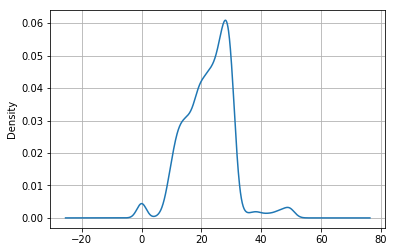

In [21]:
# Plot the distribution of distances to understand what range of values for eps could make sense

from pandas import Series
Series(reshape(dd2,(1,57*57))[0]).plot(kind='kde')
pyplot.grid(True)

Text(0.5,1,'N. clusters (green) and noise size (blue) vs. eps')

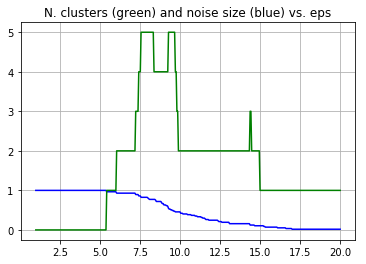

In [22]:
# Second try: run the clustering with several different values of eps and plot the results (number of clusters and size of noise)
# to choose a good threshold to use above.

eps_list = linspace(1,20.0, num=400)
#eps_list = linspace(0.78,0.8,num=200)
noise_list = array([])
n_clusters_list = array([])
silhouette_list = array([])
for myeps in eps_list:
    db = DBSCAN(myeps, min_samples=2, metric='precomputed').fit(dd2)
    noise_list = append(noise_list, sum([ 1 if i==-1 else 0 for i in db.labels_]))
    n_clusters_list = append(n_clusters_list, len(set(db.labels_)) - (1 if -1 in db.labels_ else 0))
    if(len(set(db.labels_)) > 1):
        silhouette_list = append(silhouette_list, metrics.silhouette_score(dd2, db.labels_, metric='precomputed'))
    else:
        silhouette_list = append(silhouette_list, 0)
plot(eps_list, noise_list/57, "b")
plot(eps_list, n_clusters_list, "g")
pyplot.grid(True)
pyplot.title("N. clusters (green) and noise size (blue) vs. eps")

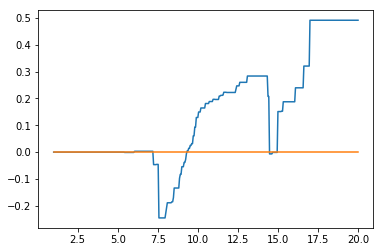

In [23]:
plot(eps_list, silhouette_list)
plot(eps_list, [0 for _ in range(len(eps_list))])

In [24]:
# proviamo un po di eps

In [25]:
db = DBSCAN(eps=8, min_samples=2, metric='precomputed').fit(dd2)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)

print('Number of clusters found: %d' % n_clusters_)
print (itemfreq(db.labels_))

cluster_sets = [ (l_,year_list[db.labels_ == l_]) for l_ in set(db.labels_) ]
for pp in cluster_sets:
    print (pp[0], "\t--> ", list(pp[1]))
print()
print('Silhouette ', metrics.silhouette_score(dd2, db.labels_, metric='precomputed'))
# la silhouette fa cagare però raggruppa le ts abbastanza bene, seppur con troppi noise

Number of clusters found: 5
[[-1 46]
 [ 0  2]
 [ 1  2]
 [ 2  2]
 [ 3  2]
 [ 4  3]]
0 	-->  ['1962', '2002']
1 	-->  ['1973', '1974']
2 	-->  ['1979', '1986']
3 	-->  ['1987', '2008']
4 	-->  ['1994', '1998', '2009']
-1 	-->  ['1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1975', '1976', '1977', '1978', '1980', '1981', '1982', '1983', '1984', '1985', '1988', '1989', '1990', '1991', '1992', '1993', '1995', '1996', '1997', '1999', '2000', '2001', '2003', '2004', '2005', '2006', '2007', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']

Silhouette  -0.226847064814


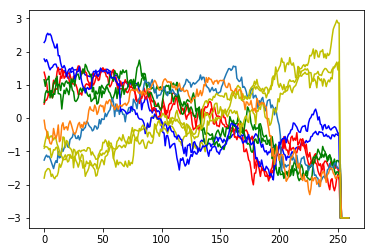

In [26]:
# tanti noise, plottiamo solo i cluster

for i in range(len(db.labels_)):
    if db.labels_[i]==0:
        plot(mm1[year_list[i]],'b')
    if db.labels_[i]==1:
        plot(mm1[year_list[i]],'r-')
    if db.labels_[i]==2:
        plot(mm1[year_list[i]],'g-')
    if db.labels_[i]==3:
        plot(mm1[year_list[i]],'-')
    if db.labels_[i]==4:
        plot(mm1[year_list[i]],'y-')

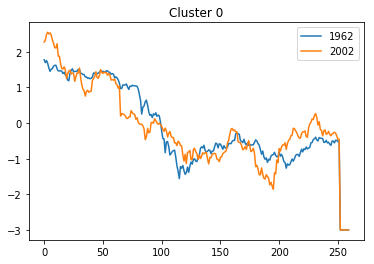

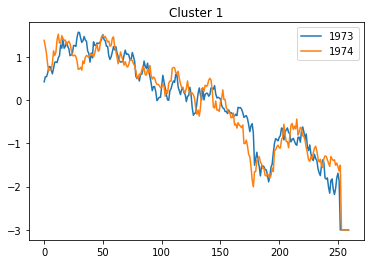

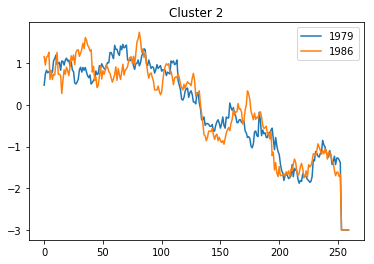

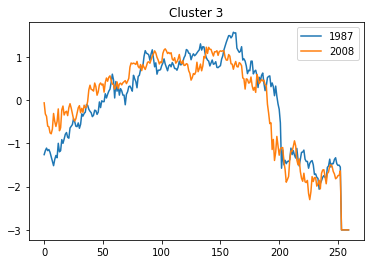

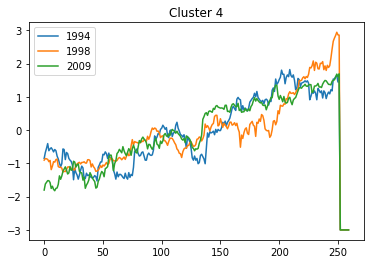

In [27]:
# plottiamo ogni cluster distintamente, esclusi i noise

for j in range(len(set(db.labels_))-1):          # per ogni cluster
    for i in range(len(db.labels_)):             # per ogni ts
        if db.labels_[i]==j:                     # se la ts sta nel cluster
            plt.plot(mm1[year_list[i]])          # la plottiamo
        
    plt.legend(year_list[db.labels_==j])         # la legenda è formata dagli anni che hanno db.labels_ uguale al cluster 
    plt.title('Cluster {}'.format(j))
    plt.show()

Stress value:  38294.1101863


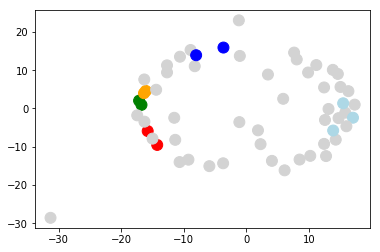

In [28]:
from sklearn import manifold
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(dd2)
print ("Stress value: ", pos.stress_)

# Assign colors based on clusters
cols = ['lightgray', 'red', 'green', 'orange', 'blue', 'lightblue']
cc = [ cols[l+1] for l in db.labels_]
scatter(pos.embedding_.T[0], pos.embedding_.T[1], color=cc, s=120)

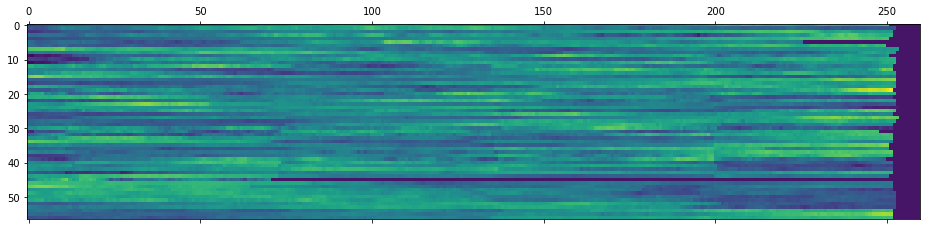

In [29]:
from operator import itemgetter
mm_sort=sorted(zip(array(mm1.T),db.labels_),key=itemgetter(1))
mm_sort2=[el[0] for el in mm_sort]
matshow(mm_sort2, interpolation=None, aspect='auto')

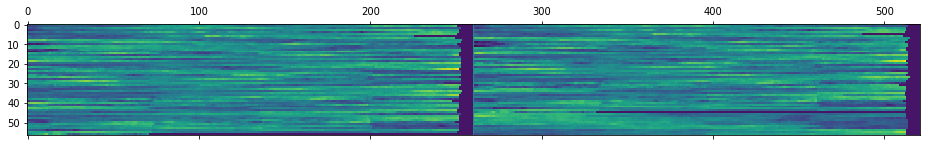

In [30]:
before = mm1.T
after = mm_sort2
separator = array([[ 0 ] * 57]).T
matshow(hstack((before, separator, after)), interpolation=None, aspect='auto')

In [31]:
db = DBSCAN(eps=12, min_samples=2, metric='precomputed').fit(dd2)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)

print('Number of clusters found: %d' % n_clusters_)
print (itemfreq(db.labels_))

cluster_sets = [ (l_,year_list[db.labels_ == l_]) for l_ in set(db.labels_) ]
for pp in cluster_sets:
    print (pp[0], "\t--> ", list(pp[1]))
print()
print('Silhouette ', metrics.silhouette_score(dd2, db.labels_, metric='precomputed'))

Number of clusters found: 2
[[-1 14]
 [ 0 22]
 [ 1 21]]
0 	-->  ['1962', '1964', '1970', '1973', '1974', '1979', '1981', '1986', '1987', '1989', '1991', '1992', '1993', '2000', '2002', '2004', '2005', '2008', '2013', '2014', '2015', '2017']
1 	-->  ['1963', '1965', '1967', '1969', '1972', '1978', '1982', '1983', '1994', '1995', '1996', '1997', '1998', '1999', '2003', '2006', '2007', '2009', '2010', '2011', '2016']
-1 	-->  ['1966', '1968', '1971', '1975', '1976', '1977', '1980', '1984', '1985', '1988', '1990', '2001', '2012', '2018']

Silhouette  0.222205034703


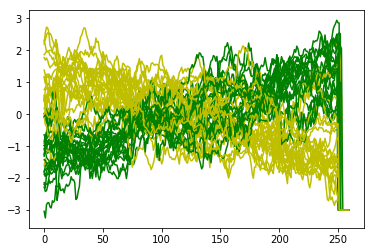

In [32]:
for i in range(len(db.labels_)):
    if db.labels_[i]==0:
        plot(mm1[year_list[i]],'y-')
    if db.labels_[i]==1:
        plot(mm1[year_list[i]],'g-')

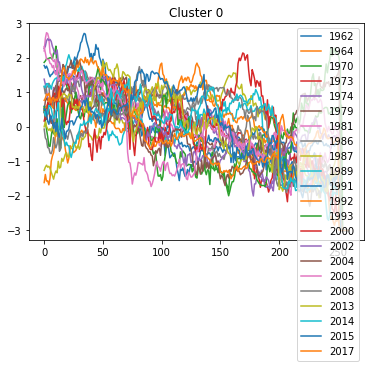

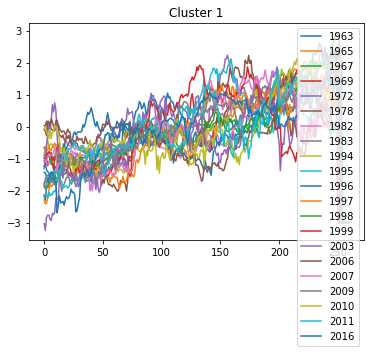

In [33]:
for j in range(len(set(db.labels_))-1):         
    for i in range(len(db.labels_)):         
        if db.labels_[i]==j:                  
            plt.plot(mm1[year_list[i]])        
        
    plt.legend(year_list[db.labels_==j])   
    plt.title('Cluster {}'.format(j))
    plt.show()
# direi che non va bene, eps è già troppo grande e mette nello stesso cluster ts diversissime

In [34]:
# proviamo vicino 10, la via di mezzo
db = DBSCAN(eps=9.8, min_samples=2, metric='precomputed').fit(dd2)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)

print('Number of clusters found: %d' % n_clusters_)
print (itemfreq(db.labels_))

cluster_sets = [ (l_,year_list[db.labels_ == l_]) for l_ in set(db.labels_) ]
for pp in cluster_sets:
    print (pp[0], "\t--> ", list(pp[1]))
print()
print('Silhouette ', metrics.silhouette_score(dd2, db.labels_, metric='precomputed'))

Number of clusters found: 3
[[-1 26]
 [ 0 10]
 [ 1 15]
 [ 2  6]]
0 	-->  ['1962', '1973', '1974', '1979', '1981', '1986', '1991', '2002', '2013', '2017']
1 	-->  ['1963', '1965', '1967', '1969', '1982', '1983', '1994', '1995', '1997', '1998', '2006', '2009', '2010', '2011', '2016']
2 	-->  ['1964', '1987', '1992', '2008', '2014', '2015']
-1 	-->  ['1966', '1968', '1970', '1971', '1972', '1975', '1976', '1977', '1978', '1980', '1984', '1985', '1988', '1989', '1990', '1993', '1996', '1999', '2000', '2001', '2003', '2004', '2005', '2007', '2012', '2018']

Silhouette  0.0931283517355


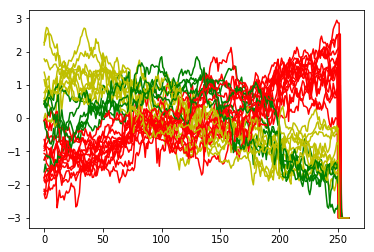

In [35]:
for i in range(len(db.labels_)):
    if db.labels_[i]==0:
        plot(mm1[year_list[i]],'y-')
    if db.labels_[i]==1:
        plot(mm1[year_list[i]],'r-')
    if db.labels_[i]==2:
        plot(mm1[year_list[i]],'g-')

In [36]:
def ts_media(df_cluster):
    ris = list()
    for attr in df_cluster.columns:
        ris.append(df_cluster[attr].mean())
        
    return pd.Series(ris)      

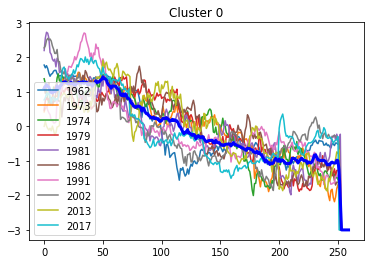

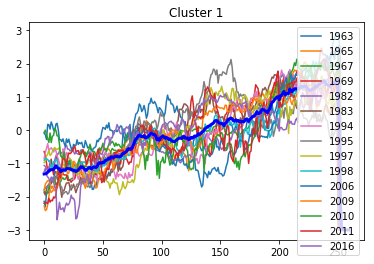

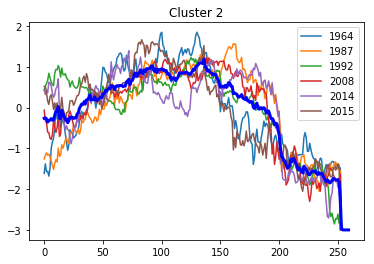

In [37]:
df_cluster = mm1.T.copy()
df_cluster['Labels'] = db.labels_
df_cluster.head()    
    
clusters = [df_cluster[df_cluster['Labels']==i].drop('Labels', axis=1) for i in range(len(set(db.labels_))-1)]
for i in range(len(clusters)):
    for year in clusters[i].index:
        plot(mm1[year])
    
    plot(ts_media(clusters[i]), 'b', linewidth=3)
    plt.legend(year_list[db.labels_==i])   
    plt.title('Cluster {}'.format(i))
    plt.show()
    
# non sembra così una merda
# 3 gruppi, uno che cresce, uno che decresce e uno che ha il picco in mezzo

Stress value:  38295.2807381


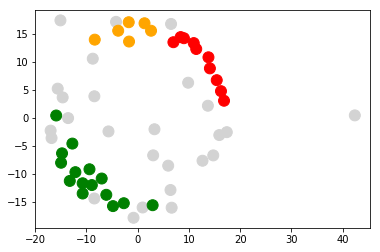

In [38]:
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(dd2)
print ("Stress value: ", pos.stress_)

# Assign colors based on clusters
cols = ['lightgray', 'red', 'green', 'orange', 'blue']
cc = [ cols[l+1] for l in db.labels_]
scatter(pos.embedding_.T[0], pos.embedding_.T[1], color=cc, s=120)

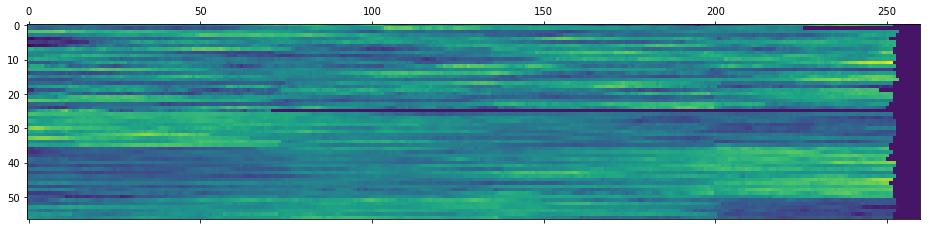

In [39]:
mm_sort=sorted(zip(array(mm1.T),db.labels_),key=itemgetter(1))
mm_sort2=[el[0] for el in mm_sort]
matshow(mm_sort2, interpolation=None, aspect='auto')

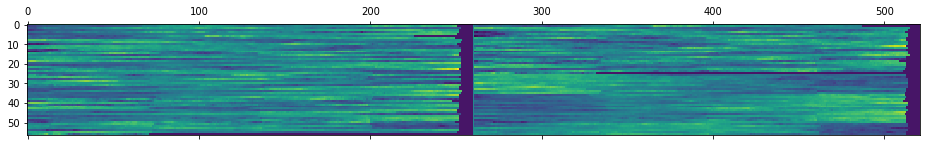

In [40]:
before = mm1.T
after = mm_sort2
separator = array([[ 0 ] * 57]).T
matshow(hstack((before, separator, after)), interpolation=None, aspect='auto')

In [41]:
# SECONDA PROVA DINAMIC TIME WARPING SENZA VINCOLI

# algoritmo del dinamic time warping

def dtw(x, y, dist):
    """
    Computes Dynamic Time Warping (DTW) of two sequences.

    :param array x: N1*M array
    :param array y: N2*M array
    :param func dist: distance used as cost measure

    Returns the minimum distance, the cost matrix, the accumulated cost matrix, and the wrap path.
    """
    assert len(x)         # questo assert serve per il debugging in qualche modo
    assert len(y)
    r, c = len(x), len(y)
    
    # D0 = D1 = matrix of point-to-point costs
    D0 = zeros((r + 1, c + 1))
    D0[0, 1:] = inf       #inf è infinito, l'elemento (0,0) è pari a 0
    D0[1:, 0] = inf
    D1 = D0[1:, 1:] # view (hide first column and first row)
    
    # Fill the point-to-point costs matrix
    for i in range(r):
        for j in range(c):
            D1[i, j] = dist(x[i], y[j])
            
    # C = matrix of optimal paths costs
    C = D1.copy()
    for i in range(r):
        for j in range(c):
            D1[i, j] += min(D0[i, j], D0[i, j+1], D0[i+1, j])    # non prende inf ma prende 0 perche è il minimo
    
    # Infer the path from matrix C
    if len(x)==1:
        path = zeros(len(y)), range(len(y))  # special case 1
    elif len(y) == 1:
        path = range(len(x)), zeros(len(x))  # special case 2
    else:
        path = _traceback(D0)  # general case
        
    return D1[-1, -1], C, D1, path

# Function for inferring the optima path (general case)
# Starts from last cell and goes backward...
def _traceback(D):
    i, j = array(D.shape) - 2
    p, q = [i], [j]
    while ((i > 0) or (j > 0)):
        tb = argmin((D[i, j], D[i, j+1], D[i+1, j]))
        if (tb == 0):
            i -= 1
            j -= 1
        elif (tb == 1):
            i -= 1
        else: # (tb == 2):
            j -= 1
        p.insert(0, i)
        q.insert(0, j)
    return array(p), array(q)

# definizione di distanza
def distance(x,y):
    return abs(x-y)

In [42]:
""""%%time

# CALCOLIAMO LA MATRICE DELLE DISTANZE

# CAUTION !!! CAN BE VERY SLOW !!!

# Compute upper half of matrix
dd1_DTW = [ [ (dtw(mm1[year_list[x]],mm1[year_list[y]],distance)[0] \
           if y > x else -1)  \
         for y in range(len(year_list)) ] 
       for x in range(len(year_list)) ]
# Copy values also to the lower half, exployting symmetry of the distance function
dd2_DTW = [ [ (dd1_DTW[x][y] if y > x else dd1_DTW[y][x])  for y in range(len(year_list)) ] for x in range(len(year_list)) ]
# Finally, the diagonal
for i in range(len(year_list)):
    dd2[i][i] = 0.0

# salvo su file
df = DataFrame(dd2_DTW)
df.to_csv('matrdist.csv')
"""

'"%%time\n\n# CALCOLIAMO LA MATRICE DELLE DISTANZE\n\n# CAUTION !!! CAN BE VERY SLOW !!!\n\n# Compute upper half of matrix\ndd1_DTW = [ [ (dtw(mm1[year_list[x]],mm1[year_list[y]],distance)[0]            if y > x else -1)           for y in range(len(year_list)) ] \n       for x in range(len(year_list)) ]\n# Copy values also to the lower half, exployting symmetry of the distance function\ndd2_DTW = [ [ (dd1_DTW[x][y] if y > x else dd1_DTW[y][x])  for y in range(len(year_list)) ] for x in range(len(year_list)) ]\n# Finally, the diagonal\nfor i in range(len(year_list)):\n    dd2[i][i] = 0.0\n\n# salvo su file\ndf = DataFrame(dd2_DTW)\ndf.to_csv(\'matrdist.csv\')\n'

In [43]:
# dovrei fare il riquadro sopra ma ci mette 32 min.. quindi ho salvato la matr in un file csv
df = pd.read_csv("matrdist.csv", index_col=0)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,-1.000000,341.233009,145.167217,356.891826,222.598744,386.175306,250.609994,358.280062,66.749561,98.672253,...,409.370940,275.148186,354.564326,196.311633,90.647725,204.710672,128.341940,381.542078,45.440369,45.700992
1,341.233009,-1.000000,205.810415,51.252167,96.394244,63.882285,102.384657,46.077560,255.441049,142.973950,...,60.619590,98.870047,48.660576,136.510460,277.531277,165.906144,262.051864,64.042269,292.739324,142.478492
2,145.167217,205.810415,-1.000000,170.313811,145.904753,225.433121,96.879731,200.690121,192.792822,82.883504,...,209.649271,263.067380,205.261173,107.357816,65.175169,93.516272,55.466847,177.977388,123.268513,55.549724
3,356.891826,51.252167,170.313811,-1.000000,108.857343,45.497079,95.697814,49.887983,240.074728,167.396928,...,47.506706,79.678617,63.749291,140.396821,266.572490,164.196918,229.515073,69.518569,305.539304,126.194908
4,222.598744,96.394244,145.904753,108.857343,-1.000000,138.799070,111.979713,89.509289,175.664739,78.731343,...,143.002410,122.522744,87.524629,140.813251,136.711839,179.727662,164.900530,137.050371,182.533385,89.853224


In [44]:
# per prendere una colonna dal df devo usare una stringa! per scegliere un elemento di una colonna uso un intero
dd2_DTW = [ [df[str(i)][j] for j in range(57)] for i in range(57)]
for i in range(57):
    dd2_DTW[i][i] = 0

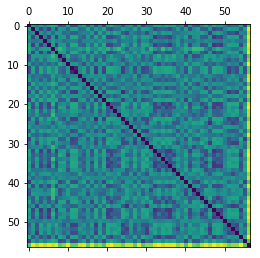

In [45]:
matshow(dd2, interpolation=None, aspect='auto')

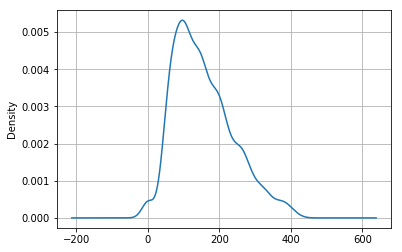

In [46]:
# Plot the distribution of distances to understand what range of values for eps could make sense

from pandas import Series
Series(reshape(dd2_DTW,(1,57*57))[0]).plot(kind='kde')
pyplot.grid(True)

Text(0.5,1,'N. clusters (green) and noise size (blue) vs. eps')

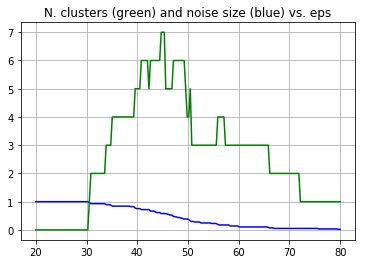

In [47]:
# Second try: run the clustering with several different values of eps and plot the results (number of clusters and size of noise)
# to choose a good threshold to use above.

eps_list = linspace(20.0,80.0, num=200)
noise_list = array([])
n_clusters_list = array([])
silhouette_list = array([])
for myeps in eps_list:
    db = DBSCAN(myeps, min_samples=2, metric='precomputed').fit(dd2_DTW)
    noise_list = append(noise_list, sum([ 1 if i==-1 else 0 for i in db.labels_]))
    n_clusters_list = append(n_clusters_list, len(set(db.labels_)) - (1 if -1 in db.labels_ else 0))
    if(len(set(db.labels_)) > 1):
        silhouette_list = append(silhouette_list, metrics.silhouette_score(dd2_DTW, db.labels_, metric='precomputed'))
    else:
        silhouette_list = append(silhouette_list, 0)
plot(eps_list, noise_list/57, "b")
plot(eps_list, n_clusters_list, "g")
pyplot.grid(True)
pyplot.title("N. clusters (green) and noise size (blue) vs. eps")

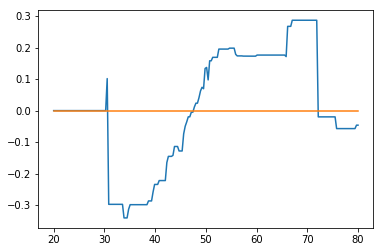

In [48]:
plot(eps_list, silhouette_list)
plot(eps_list, [0 for _ in range(len(eps_list))])

In [49]:
db = DBSCAN(eps=55, min_samples=2, metric='precomputed').fit(dd2_DTW)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)

print('Number of clusters found: %d' % n_clusters_)
print (itemfreq(db.labels_))

cluster_sets = [ (l_,year_list[db.labels_ == l_]) for l_ in set(db.labels_) ]
for pp in cluster_sets:
    print (pp[0], "\t--> ", list(pp[1]))
print()
print('Silhouette ', metrics.silhouette_score(dd2, db.labels_, metric='precomputed'))

Number of clusters found: 3
[[-1 13]
 [ 0 22]
 [ 1 20]
 [ 2  2]]
0 	-->  ['1962', '1964', '1970', '1971', '1973', '1974', '1977', '1979', '1981', '1986', '1987', '1989', '1991', '1992', '2002', '2005', '2008', '2013', '2014', '2015', '2017', '2018']
1 	-->  ['1963', '1965', '1967', '1968', '1969', '1982', '1983', '1994', '1995', '1996', '1997', '1998', '1999', '2003', '2006', '2007', '2009', '2010', '2011', '2016']
2 	-->  ['1980', '1984']
-1 	-->  ['1966', '1972', '1975', '1976', '1978', '1985', '1988', '1990', '1993', '2000', '2001', '2004', '2012']

Silhouette  0.153074641613


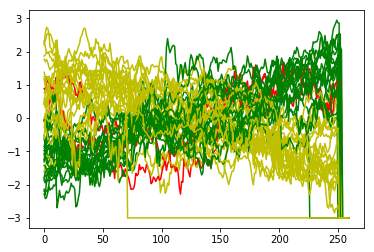

In [50]:
for i in range(len(db.labels_)):
    if db.labels_[i]==0:
        plot(mm1[year_list[i]],'y-')
    if db.labels_[i]==1:
        plot(mm1[year_list[i]],'g-')
    if db.labels_[i]==2:
        plot(mm1[year_list[i]],'r-')

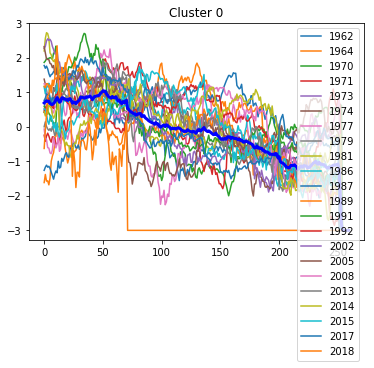

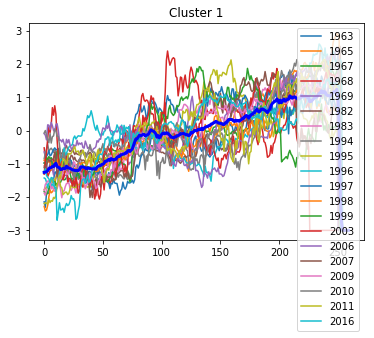

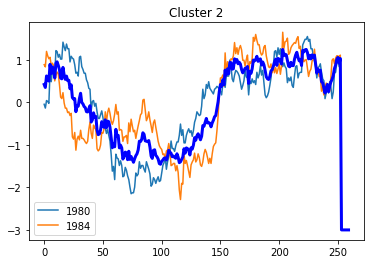

In [51]:
df_cluster = mm1.T.copy()
df_cluster['Labels'] = db.labels_
df_cluster.head()    
    
clusters = [df_cluster[df_cluster['Labels']==i].drop('Labels', axis=1) for i in range(len(set(db.labels_))-1)]
for i in range(len(clusters)):
    for year in clusters[i].index:
        plot(mm1[year])
    plot(ts_media(clusters[i]), 'b', linewidth=3)
    plt.legend(year_list[db.labels_==i])   
    plt.title('Cluster {}'.format(i))
    plt.show()
    
# 55 direi che è troppo alto

In [52]:
db = DBSCAN(eps=45, min_samples=2, metric='precomputed').fit(dd2_DTW)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)

print('Number of clusters found: %d' % n_clusters_)
print (itemfreq(db.labels_))

cluster_sets = [ (l_,year_list[db.labels_ == l_]) for l_ in set(db.labels_) ]
for pp in cluster_sets:
    print (pp[0], "\t--> ", list(pp[1]))
print()
print('Silhouette ', metrics.silhouette_score(dd2, db.labels_, metric='precomputed'))

Number of clusters found: 7
[[-1 33]
 [ 0  3]
 [ 1  3]
 [ 2  3]
 [ 3  7]
 [ 4  2]
 [ 5  4]
 [ 6  2]]
0 	-->  ['1962', '1981', '2002']
1 	-->  ['1964', '1987', '2008']
2 	-->  ['1965', '1983', '1995']
3 	-->  ['1967', '1969', '1982', '1994', '1997', '1998', '2009']
4 	-->  ['1968', '1999']
5 	-->  ['1973', '1974', '1979', '1986']
6 	-->  ['2017', '2018']
-1 	-->  ['1963', '1966', '1970', '1971', '1972', '1975', '1976', '1977', '1978', '1980', '1984', '1985', '1988', '1989', '1990', '1991', '1992', '1993', '1996', '2000', '2001', '2003', '2004', '2005', '2006', '2007', '2010', '2011', '2012', '2013', '2014', '2015', '2016']

Silhouette  -0.147246007144


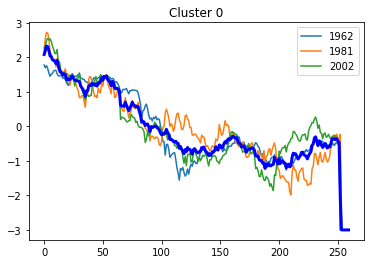

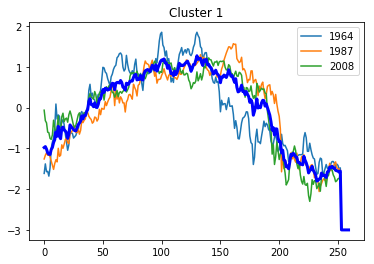

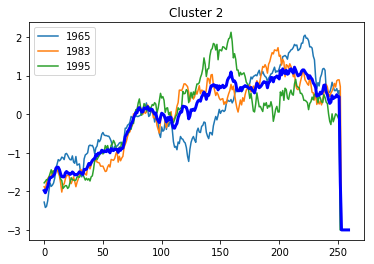

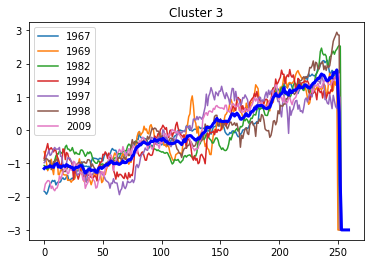

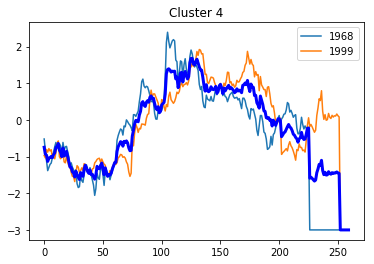

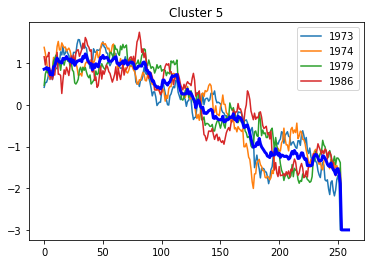

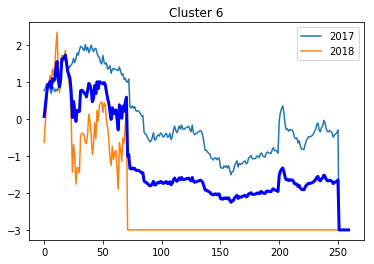

In [53]:
df_cluster = mm1.T.copy()
df_cluster['Labels'] = db.labels_
df_cluster.head()    
    
clusters = [df_cluster[df_cluster['Labels']==i].drop('Labels', axis=1) for i in range(len(set(db.labels_))-1)]
for i in range(len(clusters)):
    for year in clusters[i].index:
        plot(mm1[year])
    plot(ts_media(clusters[i]), 'b', linewidth=3)
    plt.legend(year_list[db.labels_==i])   
    plt.title('Cluster {}'.format(i))
    plt.show()

Stress value:  1364552.65582


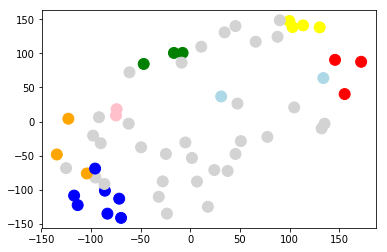

In [54]:
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(dd2_DTW)
print ("Stress value: ", pos.stress_)

# Assign colors based on clusters
cols = ['lightgray', 'red', 'green', 'orange', 'blue', 'pink', 'yellow', 'lightblue']
cc = [ cols[l+1] for l in db.labels_]
scatter(pos.embedding_.T[0], pos.embedding_.T[1], color=cc, s=120)

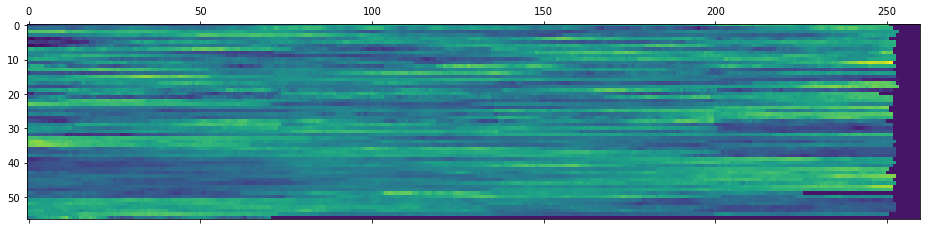

In [55]:
from operator import itemgetter
mm_sort=sorted(zip(array(mm1.T),db.labels_),key=itemgetter(1))
mm_sort2=[el[0] for el in mm_sort]
matshow(mm_sort2, interpolation=None, aspect='auto')

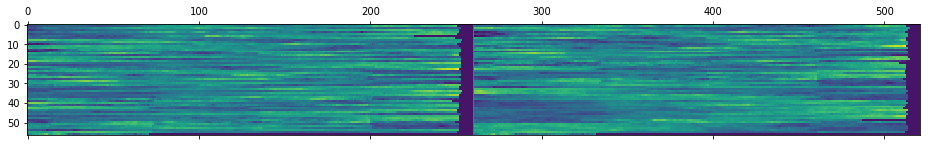

In [56]:
before = mm1.T
after = mm_sort2
separator = array([[ 0 ] * 57]).T
matshow(hstack((before, separator, after)), interpolation=None, aspect='auto')

In [57]:
# la via di mezzo
db = DBSCAN(eps=48, min_samples=2, metric='precomputed').fit(dd2_DTW)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)

print('Number of clusters found: %d' % n_clusters_)
print (itemfreq(db.labels_))

cluster_sets = [ (l_,year_list[db.labels_ == l_]) for l_ in set(db.labels_) ]
for pp in cluster_sets:
    print (pp[0], "\t--> ", list(pp[1]))
print()
print('Silhouette ', metrics.silhouette_score(dd2, db.labels_, metric='precomputed'))

Number of clusters found: 6
[[-1 25]
 [ 0  5]
 [ 1 12]
 [ 2  3]
 [ 3  3]
 [ 4  2]
 [ 5  7]]
0 	-->  ['1962', '1981', '2002', '2017', '2018']
1 	-->  ['1963', '1965', '1967', '1969', '1982', '1983', '1994', '1995', '1997', '1998', '2009', '2011']
2 	-->  ['1964', '1987', '2008']
3 	-->  ['1968', '1999', '2007']
4 	-->  ['1970', '2005']
5 	-->  ['1973', '1974', '1979', '1986', '1992', '2013', '2015']
-1 	-->  ['1966', '1971', '1972', '1975', '1976', '1977', '1978', '1980', '1984', '1985', '1988', '1989', '1990', '1991', '1993', '1996', '2000', '2001', '2003', '2004', '2006', '2010', '2012', '2014', '2016']

Silhouette  -0.00247235079399


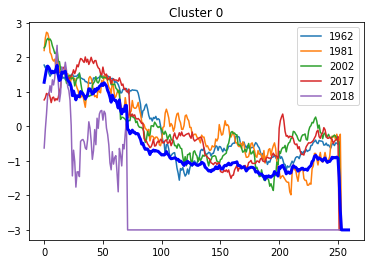

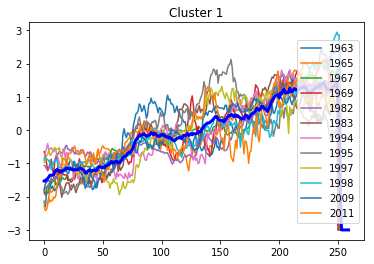

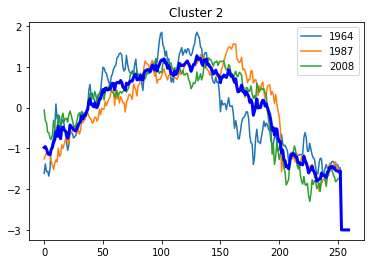

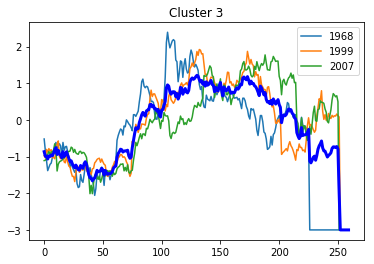

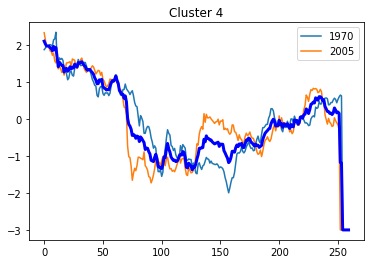

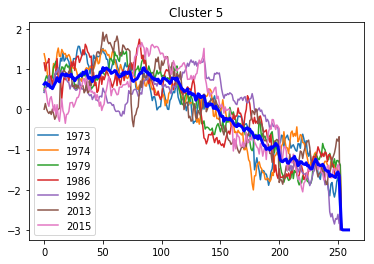

In [58]:
df_cluster = mm1.T.copy()
df_cluster['Labels'] = db.labels_
df_cluster.head()    
    
clusters = [df_cluster[df_cluster['Labels']==i].drop('Labels', axis=1) for i in range(len(set(db.labels_))-1)]
for i in range(len(clusters)):
    for year in clusters[i].index:
        plot(mm1[year])
    plot(ts_media(clusters[i]), 'b', linewidth=3)
    plt.legend(year_list[db.labels_==i])   
    plt.title('Cluster {}'.format(i))
    plt.show()

Stress value:  1361716.56614


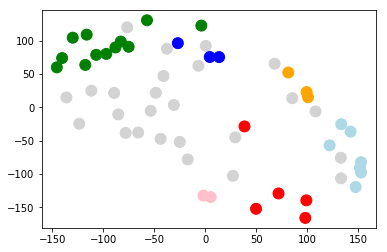

In [59]:
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(dd2_DTW)
print ("Stress value: ", pos.stress_)

# Assign colors based on clusters
cols = ['lightgray', 'red', 'green', 'orange', 'blue', 'pink', 'lightblue']
cc = [ cols[l+1] for l in db.labels_]
scatter(pos.embedding_.T[0], pos.embedding_.T[1], color=cc, s=120)

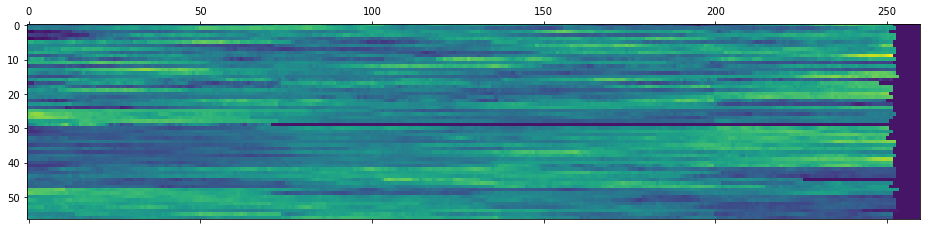

In [60]:
from operator import itemgetter
mm_sort=sorted(zip(array(mm1.T),db.labels_),key=itemgetter(1))
mm_sort2=[el[0] for el in mm_sort]
matshow(mm_sort2, interpolation=None, aspect='auto')

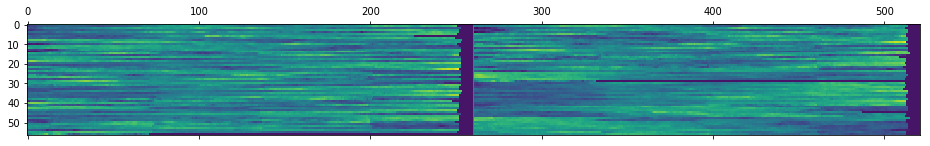

In [61]:
before = mm1.T
after = mm_sort2
separator = array([[ 0 ] * 57]).T
matshow(hstack((before, separator, after)), interpolation=None, aspect='auto')

In [62]:
# PROVIAMO K-MEANS

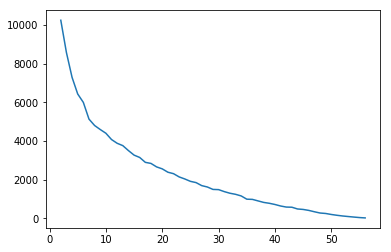

In [63]:
from sklearn.cluster import KMeans

SSE_list = []

for k in range(2, 57):
    km = KMeans(n_clusters=k)
    km.fit(mm1.T)
    SSE_list.append(km.inertia_)

plot(range(2, 57), SSE_list)


In [64]:
# PROVIAMO QUALCHE K
k = 8
km = KMeans(n_clusters=k)
km.fit(mm1.T)

from scipy.stats import itemfreq

print (itemfreq(km.labels_))
print ('SSE : ', km.inertia_)

[[ 0  9]
 [ 1 10]
 [ 2 15]
 [ 3  1]
 [ 4  6]
 [ 5  6]
 [ 6  9]
 [ 7  1]]
SSE :  4871.74034567


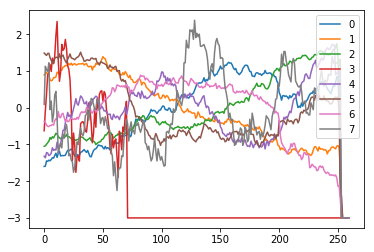

In [65]:
for i in range(k):
    plot(km.cluster_centers_[i])

legend(range(k), loc='best')

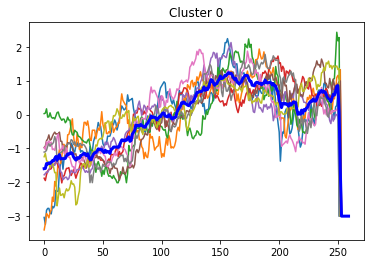

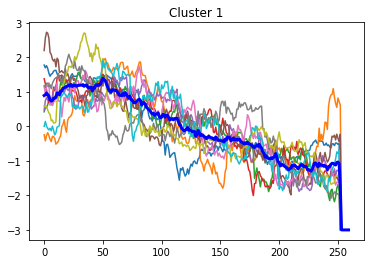

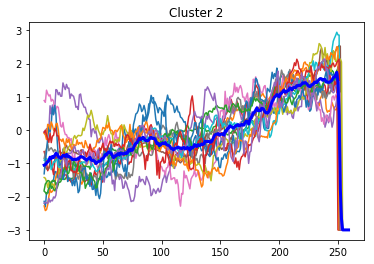

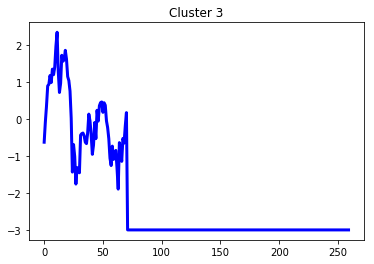

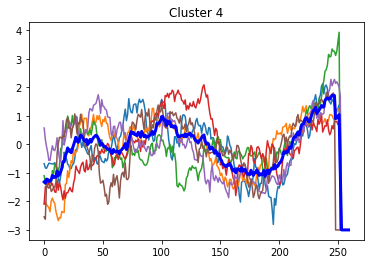

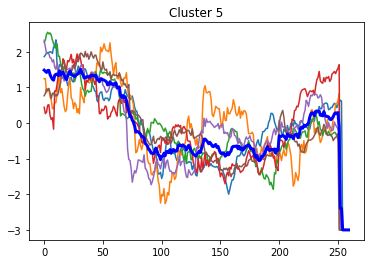

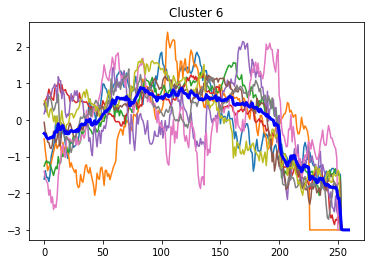

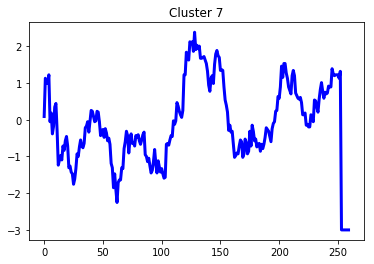

In [66]:
for j in range(k):
    for i in range(len(km.labels_)):
        if km.labels_[i]==j:
            plot(mm1[year_list[i]])
    plot(km.cluster_centers_[j], 'b', linewidth=3)
    plt.title('Cluster {}'.format(j))
    plt.show()

In [67]:
# II prova
k = 20
km = KMeans(n_clusters=k)
km.fit(mm1.T)

print (itemfreq(km.labels_))
print ('SSE : ', km.inertia_)

[[ 0  4]
 [ 1  4]
 [ 2  2]
 [ 3  8]
 [ 4  6]
 [ 5  1]
 [ 6  1]
 [ 7  6]
 [ 8  7]
 [ 9  1]
 [10  2]
 [11  1]
 [12  3]
 [13  2]
 [14  3]
 [15  1]
 [16  1]
 [17  1]
 [18  2]
 [19  1]]
SSE :  2496.28097188


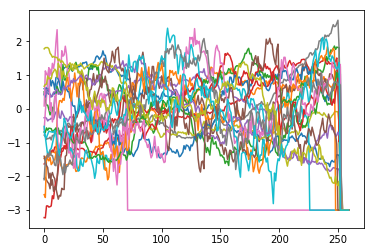

In [68]:
for i in range(k):
    plot(km.cluster_centers_[i])

In [69]:
# III prova
k = 30
km = KMeans(n_clusters=k)
km.fit(mm1.T)

print (itemfreq(km.labels_))
print ('SSE : ', km.inertia_)

[[ 0  6]
 [ 1  5]
 [ 2  2]
 [ 3  2]
 [ 4  2]
 [ 5  1]
 [ 6  4]
 [ 7  1]
 [ 8  2]
 [ 9  1]
 [10  3]
 [11  1]
 [12  2]
 [13  1]
 [14  1]
 [15  1]
 [16  1]
 [17  1]
 [18  1]
 [19  2]
 [20  1]
 [21  1]
 [22  4]
 [23  1]
 [24  1]
 [25  1]
 [26  2]
 [27  1]
 [28  4]
 [29  1]]
SSE :  1465.90937692


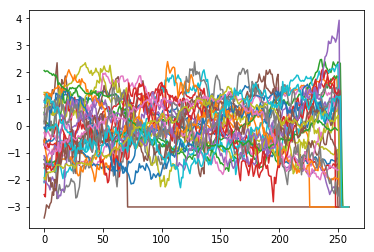

In [70]:
for i in range(k):
    plot(km.cluster_centers_[i])